In [ ]:
!pip install tensorflow keras numpy matplotlib opencv-python-headless

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Carregar o modelo VGG16 pré-treinado (com pesos do ImageNet)
model = VGG16(weights='imagenet')
model.summary() # Para ver a arquitetura do modelo

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Caminho para sua imagem de teste
img_path = 'GATOS-SIAMESES-1.jpg'

# Carregar a imagem e redimensioná-la para o tamanho esperado pelo VGG16 (224x224)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) # Pré-processamento específico do VGG16 (normalização)

# Faça uma previsão com o modelo
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02123597', 'Siamese_cat', np.float32(1.0)), ('n02091467', 'Norwegian_elkhound', np.float32(2.1352806e-08)), ('n02124075', 'Egyptian_cat', np.float32(7.415594e-09))]


In [5]:
# Encontrar o índice da camada convolucional alvo
last_conv_layer_name = "block5_conv3"
last_conv_layer = model.get_layer(last_conv_layer_name)

# Crie um modelo que produza a saída da última camada convolucional E a previsão final
grad_model = tf.keras.models.Model(
    [model.inputs], [last_conv_layer.output, model.output]
)

# Obtenha o índice da classe prevista (a classe de interesse)
# Por exemplo, se a classe mais provável for "Labrador retriever", encontre seu índice.
# Você pode pegar o índice da primeira previsão (mais provável)
# Ex: predicted_class_id = np.argmax(preds[0])
# Ou, se quiser uma classe específica:
predicted_class_id = np.argmax(preds[0])

In [8]:
with tf.GradientTape() as tape:
    last_conv_layer_output, predictions = grad_model(x)
    class_channel = predictions[:, predicted_class_id]

# Calcule os gradientes da classe de interesse em relação à saída da última camada convolucional
grads = tape.gradient(class_channel, last_conv_layer_output)

# Pool os gradientes em todos os canais para obter um peso por canal
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiplique a saída da última camada convolucional pelos pesos dos gradientes
last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Normalizar o mapa de calor (opcional, mas recomendado para visualização)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


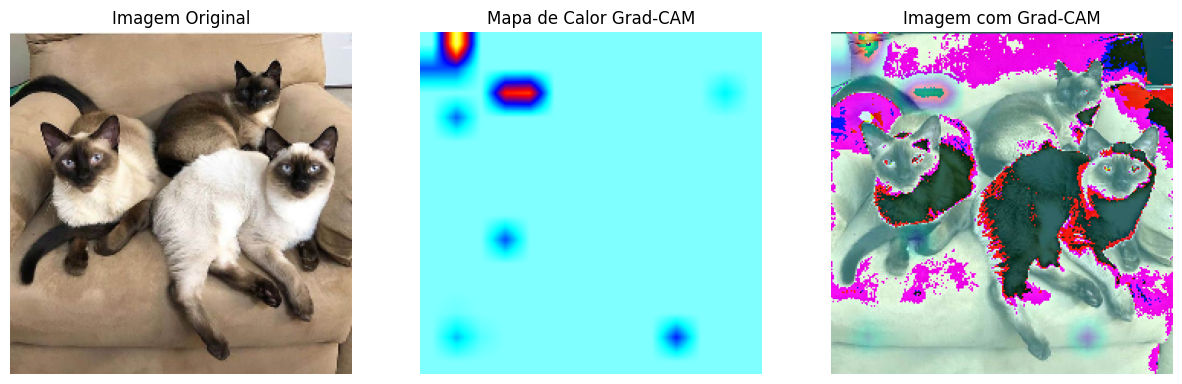

In [9]:
# Carregar a imagem original (para visualização)
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224)) # Redimensionar para o mesmo tamanho do processamento
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converter de BGR para RGB

# Redimensionar o mapa de calor para o tamanho da imagem original
heatmap = heatmap.numpy()
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Converter o mapa de calor para um formato de 0-255 e aplicar um mapa de cores
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Sobrepor o mapa de calor na imagem original
# Você pode ajustar o peso da sobreposição (alpha)
superimposed_img = (255-heatmap) * 0.4 + img
superimposed_img = np.uint8(superimposed_img)

# Exibir a imagem original, o mapa de calor e a imagem sobreposta
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(255-heatmap)
plt.title('Mapa de Calor Grad-CAM')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img)
plt.title('Imagem com Grad-CAM')
plt.axis('off')

plt.show()